In [1]:
from textblob import TextBlob
import tweepy
import twitter_credentials as tc
import sys
import re  
import pandas as pd


#auth
auth = tweepy.OAuthHandler(tc.API_KEY, tc.API_KEY_SECRET)
auth.set_access_token(tc.ACCESS_TOKEN, tc.ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

In [2]:
search_term = 'world cup 2022'
tweet_amount = 2000

tweets = tweepy.Cursor(method=api.search_tweets, q=search_term, lang='en',until="2022-12-23").items(tweet_amount)

In [3]:
polarity = 0

positive = 0
negative = 0
neutral = 0

tweets_clean = []
for tweet in tweets:
    tweet_text = tweet.text.replace('RT', '')       #Remove the RT Tags
    if tweet_text.startswith(' @'):                  #Remove usernames
        position = tweet_text.index(':')
        tweet_text = tweet_text[position+2:]
        tweets_clean.append(tweet_text)
    if tweet_text.startswith('@'):                  #Remove usernames
        position = tweet_text.index(' ')
        tweet_text = tweet_text[position+2:]
        tweets_clean.append(tweet_text)
    #print(tweet_text)
    #Analysis
    analysis = TextBlob(tweet_text)
    tweet_polarity = analysis.polarity
    polarity += tweet_polarity
    if tweet_polarity>0:
        positive +=1
    elif tweet_polarity<0:
        negative+=1
    else:
        neutral+=1

print("polarity :", polarity)                            # We obtained A polarity of +54 which means the overal sentiment is very positive over the 200 tweets
print("positive tweets : ",positive)
print("negative tweets : ",negative)
print("neutral tweets : ",neutral)


polarity : 304.2394871332368
positive tweets :  881
negative tweets :  137
neutral tweets :  982


In [4]:
#print(tweets_clean)

In [5]:
all_sentences = []
for word in tweets_clean:
    all_sentences.append(word)
    
all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


#print(lines)


In [6]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]           #remove punctuations

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

#print(lines2)

In [7]:
#Stemming

stem = []

for word in lines2:
    wordtostemlist = TextBlob(word).words
    for word2 in wordtostemlist:
        stem.append(word2.stem())
        
#stem

In [8]:
#Remove StopWords
from nltk.corpus import stopwords

stem2 = []
stop_words = set(stopwords.words('english'))

for word in stem:
    if word not in stop_words:
        stem2.append(word)

#stem2

In [9]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()           # Count the occurence of each distinct word
pd.set_option('display.max_rows', 100)

df

cup          1485
world        1472
2022         1188
fifa          627
messi         382
             ... 
theyv           1
joy             1
midseason       1
also            1
protest         1
Name: 0, Length: 1851, dtype: int64

In [10]:
# Words frequencies

from nltk.probability import FreqDist

fdist = FreqDist()

for word in df:
    fdist[word] += 1

fdist

FreqDist({1: 836, 2: 253, 3: 138, 4: 87, 5: 65, 6: 44, 7: 24, 15: 23, 9: 23, 10: 20, ...})

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

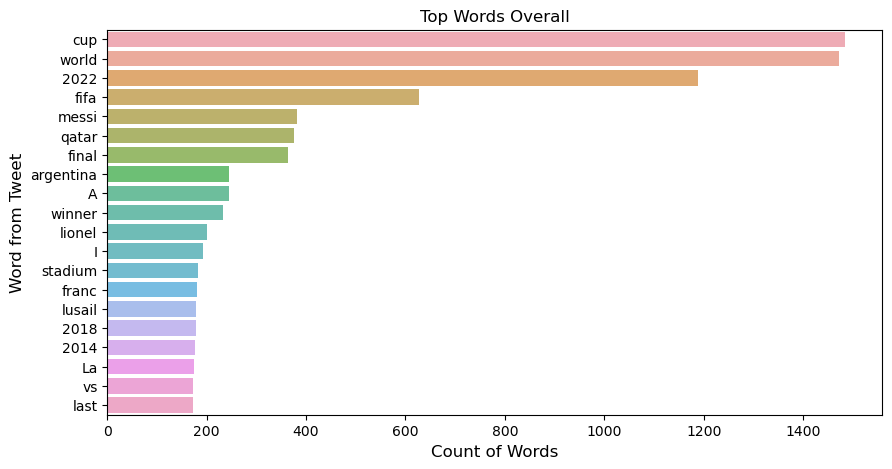

In [12]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [13]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [14]:
str1 = " " 
stem2 = str1.join(lines2)       # A String regrouping all words from lines2

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]      #list of tuples ("word", "entity") entity can be ORG, DATE, PERSON,EVENT...

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')           # Filter that contain only ORG entities

df7 = df7['Word'].value_counts()

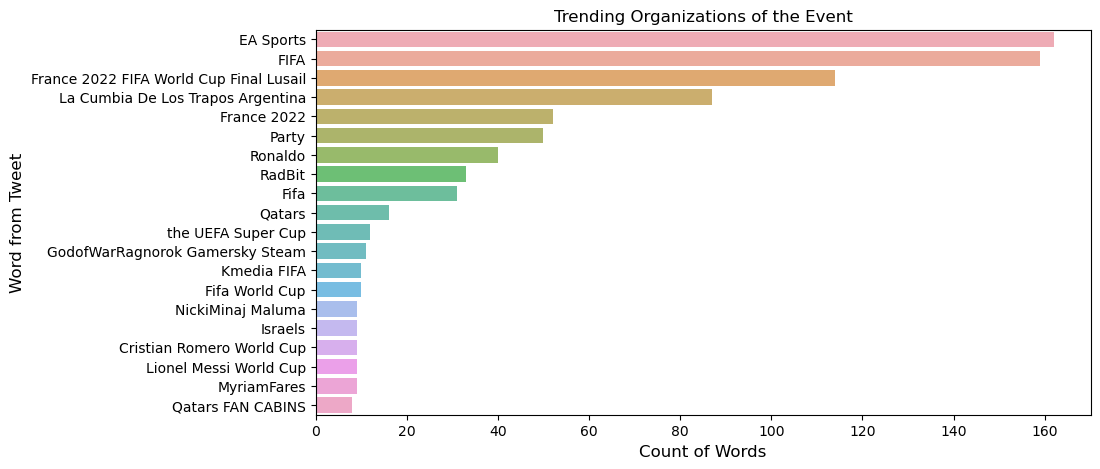

In [15]:
df = df7[:20,]                     # TOP 20 ORG
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Trending Organizations of the Event')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [16]:
df8 = df6.where(df6['Entity']=='PERSON')
df8 = df8['Word'].value_counts()

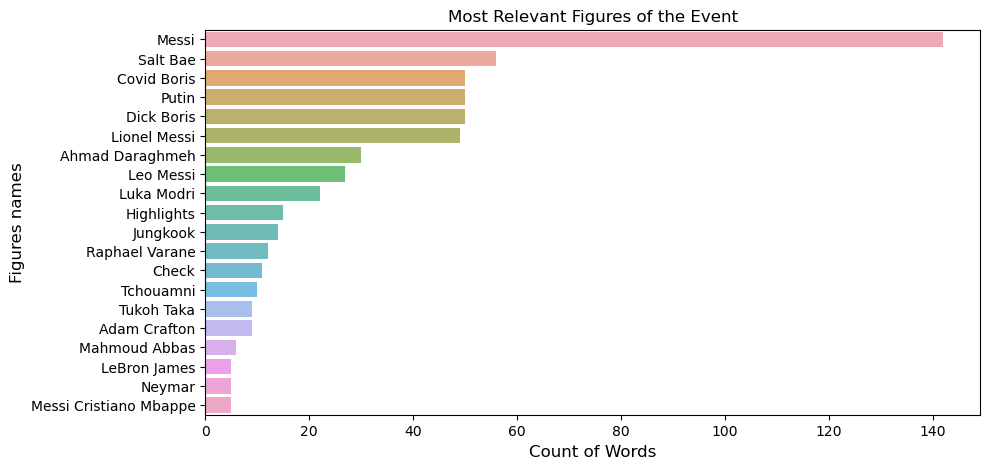

In [17]:
df = df8[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index,alpha=0.8)
plt.title("Most Relevant Figures of the Event")
plt.ylabel("Figures names",fontsize=12)
plt.xlabel("Count of Words",fontsize=12)
plt.show()